In [1]:
run profiles/compute_profiles.py --project_file glacier_flow_tools/data/bedmachine.toml --alpha 0.05 --n_jobs 4 --result_dir profiles/2024_06_foo --velocity_url /mnt/storstrommen/data/its-live/GRE_G0240_0000.nc --profiles_url glacier_flow_tools/data/greenland-flux-gates.gpkg  /mnt/storstrommen/pism-greenland/calibration/2024_05_init_bedmachine_tw/state/gris_g1800m_v*_GrIMP_id_CTRL_0_20.nc 

Opening experiments


/home/andy/miniforge3/envs/glacier-flow-tools/lib/python3.11/site-packages/xarray/core/dataset.py:4743: UserWarning: No index created for dimension exp_id because variable exp_id is not a coordinate. To create an index for exp_id, please first call `.set_coords('exp_id')` on this object.
  warnings.warn(


Time elapsed 5s


In [2]:
import xskillscore as xs

In [10]:
exp_ds["velsurf_mag"] = (exp_ds["uvelsurf"]**2 + exp_ds["vvelsurf"]**2)**(1/2)
xs.mae(exp_ds["velsurf_mag"], velocity_ds["v"].interp_like(exp_ds))

ValueError: tuple.index(x): x not in tuple

In [14]:
v_obs = velocity_ds["v"].interp_like(exp_ds)
v_sim = exp_ds["velsurf_mag"]

In [17]:
xs.mae(v_sim, v_obs)

ValueError: tuple.index(x): x not in tuple

In [79]:
v_obs

<xarray.DataArray 'v' (y: 1520, x: 880)> Size: 5MB
dask.array<transpose, shape=(1520, 880), dtype=float32, chunksize=(1520, 880), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 7kB -6.778e+05 -6.76e+05 ... 9.026e+05 9.044e+05
  * y        (y) float64 12kB -3.371e+06 -3.369e+06 ... -6.383e+05 -6.365e+05
Attributes:
    units:                m/yr
    standard_name:        velocity
    quality_cutoff:       7.0
    map_scale_corrected:  1
    grid_mapping:         Polar_Stereographic

In [25]:
np.abs(v_sim-v_obs).mean(dim=["x", "y"])

<xarray.DataArray (exp_id: 5, time: 1)> Size: 20B
dask.array<mean_agg-aggregate, shape=(5, 1), dtype=float32, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * exp_id   (exp_id) int64 40B 1 2 4 3 5
  * time     (time) object 8B 0021-01-01 00:00:00

In [76]:
import numpy as np
import pint
from pint import UnitRegistry

ureg = UnitRegistry()

def u_def_slab(H: pint.Quantity[float, '[speed]'], alpha: pint.Quantity, n: float) -> pint.Quantity: 

    f = np.sin(alpha)
    return 2 * A * (rho * g * f)**n * ((H**(n+1))/(n+1))

def u_def_channel(R: float, alpha: float, n: float) -> float:
    
    f = np.sin(alpha*np.pi/180)
    return 2 * A * (0.5 * rho * g * f)**n * ((R**(n+1))/(n+1)) * secpera

n = 3
rho = 910 * ureg.kg / ureg.m**3
g = 9.81 * ureg.m / ureg.s**2
alpha = 1.7 * ureg.degree
A = 2.4e-24 / ureg.s / ureg.Pa**n

H = 900 * ureg.m
R = 1500 * ureg.m
secpera = 31556926


TypeError: <class 'pint.registry.Quantity'> is not a generic class

In [77]:
ScalarV = pint.Quantity[float, '[speed]']

TypeError: <class 'pint.registry.Quantity'> is not a generic class

In [70]:
ureg.arcdeg?

Type:            Unit
String form:     degree
File:            ~/miniforge3/envs/glacier-flow-tools/lib/python3.11/site-packages/pint/__init__.py
Docstring:       <no docstring>
Class docstring: Implements a class to describe a unit supporting math operations.

In [71]:
u_def_slab(H, alpha, n).to_base_units().to("m/yr")

461.5025945389025 <Unit('meter / year')>

In [72]:
pint.Quantity?


Init signature: pint.Quantity(value, units=None)
File:           ~/miniforge3/envs/glacier-flow-tools/lib/python3.11/site-packages/pint/registry.py
Type:           type
Subclasses:     Quantity, Quantity, Quantity, Quantity, Quantity, Quantity, Quantity, Quantity, Quantity, Quantity, ...

In [45]:
ureg.pascal.compatible_units()

frozenset({<Unit('sound_pressure_level')>,
           <Unit('barye')>,
           <Unit('pascal')>,
           <Unit('centimeter_H2O')>,
           <Unit('torr')>,
           <Unit('millimeter_Hg')>,
           <Unit('inch_H2O_60F')>,
           <Unit('inch_H2O_39F')>,
           <Unit('centimeter_Hg')>,
           <Unit('foot_H2O')>,
           <Unit('inch_Hg_60F')>,
           <Unit('inch_Hg')>,
           <Unit('pound_force_per_square_inch')>,
           <Unit('technical_atmosphere')>,
           <Unit('bar')>,
           <Unit('standard_atmosphere')>,
           <Unit('kip_per_square_inch')>})

In [43]:
2 * A * (rho * g * f)**n * ((H**(n+1))/(n+1))

1.462413474215094e-05 <Unit('kilogram ** 3 / meter ** 2 / pascal ** 3 / second ** 7')>

In [44]:
def u_def_slab(H: float, alpha: float, n: float) -> float: 

    f = np.sin(alpha*np.pi/180)
    return 2 * A * (rho * g * f)**n * ((H**(n+1))/(n+1)) * secpera

def u_def_channel(R: float, alpha: float, n: float) -> float:
    
    f = np.sin(alpha*np.pi/180)
    return 2 * A * (0.5 * rho * g * f)**n * ((R**(n+1))/(n+1)) * secpera

rho = 910 
g = 9.81
alpha = 1.7
A = 2.4e-24
n = 3
secpera = 31556926

R = 1500
H = 900

print('Exercise 1: Flow speeds')
print('-----------------------\n')
print('channel speed for radius {}m: {:3.0f} m/yr'.format(R,
                                                          u_def_channel(R, alpha, n)))
print('channel speed for thickness {}m: {:3.0f} m/yr'.format(H,
                                                             u_def_channel(R, alpha, n)/8))
print('slab speed for thickness {}m: {:3.0f} m/yr'.format(H,
                                                          u_def_slab(H, alpha, n)))


Exercise 1: Flow speeds
-----------------------

channel speed for radius 1500m: 445 m/yr
channel speed for thickness 900m:  56 m/yr
slab speed for thickness 900m: 461 m/yr


In [78]:
ls

build.py                   glacier_flow_tools.egg-info/  python/
codecov.yml                images/                       README.md
convert_to_xarray.ipynb    LICENSE                       requirements.txt
doc/                       notebooks/                    src/
drainage_basin_generator/  pathlines/                    tests/
environment.yml            profiles/                     Untitled.ipynb
examples/                  __pycache__/
glacier_flow_tools/        pyproject.toml


In [44]:
from scipy.ndimage import gaussian_filter, generic_filter
import xarray as xr

In [4]:
from pathlib import Path
from typing import Dict, List, Optional, Union

import cartopy.crs as ccrs
import cf_xarray.units  # pylint: disable=unused-import
import geopandas as gp
import matplotlib
import numpy as np
import pint_xarray  # pylint: disable=unused-import
import pylab as plt
import seaborn as sns
import xarray as xr
from matplotlib import cm, colors
from matplotlib.colors import LightSource
from shapely import get_coordinates

from glacier_flow_tools.utils import (
    blend_multiply,
    figure_extent,
    get_dataarray_extent,
    register_colormaps,
)

register_colormaps()


In [25]:
def plot_glacier(
    surface: xr.DataArray,
    overlay: xr.DataArray,
    cmap: str = "viridis",
    vmin: float = 10,
    vmax: float = 1500,
    ticks: Union[List[float], np.ndarray] = [10, 100, 250, 500, 750, 1500],
    fontsize: float = 6,
    figwidth: float = 3.2,
):
    """
    Plot a surface over a hillshade, add profile and correlation coefficient.

    This function plots a surface over a hillshade, adds a profile and correlation coefficient.
    The plot is saved as a PDF file in the specified result directory.

    Parameters
    ----------
    surface : xr.DataArray
        The surface to be plotted over the hillshade.
    overlay : xr.DataArray
        The overlay to be added to the plot.
    result_dir : Union[str, Path]
        The directory where the result PDF file will be saved.
    cmap : str, optional
        The colormap to be used for the plot, by default "viridis".
    vmin : float, optional
        The minimum value for the colormap, by default 10.
    vmax : float, optional
        The maximum value for the colormap, by default 1500.
    ticks : Union[List[float], np.ndarray], optional
        The ticks to be used for the colorbar, by default [10, 100, 250, 500, 750, 1500].
    fontsize : float, optional
        The font size to be used for the plot, by default 6.
    figwidth : float, optional
        The width of the figure in inches, by default 3.2.

    Examples
    --------
    >>> plot_glacier(profile_series, surface, overlay, '/path/to/result_dir')
    """
    plt.rcParams["font.size"] = fontsize
    cartopy_crs = ccrs.NorthPolarStereo(central_longitude=-45, true_scale_latitude=70, globe=None)
    # Shade from the northwest, with the sun 45 degrees from horizontal
    light_source = LightSource(azdeg=315, altdeg=45)
    glacier_overlay = overlay
    glacier_surface = surface.interp_like(glacier_overlay)

    extent = get_dataarray_extent(glacier_overlay)
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    mapper = cm.ScalarMappable(norm=norm, cmap=cmap)

    v = mapper.to_rgba(glacier_overlay.to_numpy())
    z = glacier_surface.to_numpy()

    ar = 1.0  # initial aspect ratio for first trial
    wi = figwidth  # width in inches
    hi = wi * ar  # height in inches

    fig = plt.figure(figsize=(wi, hi))
    ax = fig.add_subplot(111, projection=cartopy_crs)
    rgb = light_source.shade_rgb(v, elevation=z, vert_exag=0.01, blend_mode=blend_multiply)
    # Use a proxy artist for the colorbar...
    im = ax.imshow(v, cmap=cmap, vmin=vmin, vmax=vmax)
    im.remove()
    ax.imshow(rgb, extent=extent, origin="upper", transform=cartopy_crs)
    ax.gridlines(
        draw_labels={"top": "x", "left": "y"},
        dms=True,
        xlocs=np.arange(-50, 0, 1),
        ylocs=np.arange(50, 88, 1),
        x_inline=False,
        y_inline=False,
        rotate_labels=20,
        ls="dotted",
        color="k",
    )

    fig.colorbar(im, ax=ax, shrink=0.5, pad=0.025, label=overlay.units, extend="both", ticks=ticks)
    plt.draw()

    # Get proper ratio here
    xmin, xmax = ax.get_xbound()
    ymin, ymax = ax.get_ybound()
    y2x_ratio = (ymax - ymin) / (xmax - xmin)
    fig.set_figheight(wi * y2x_ratio)
    fig.tight_layout()
    plt.close()
    return fig


In [26]:
ds = xr.open_dataset("/mnt/storstrommen/data/MCdataset/BedMachineGreenland-v5.nc")

In [40]:
jak_ds = ds.sel(x=slice(-226_000, -140_000), y=slice(-2_250_000, -2_300_000))

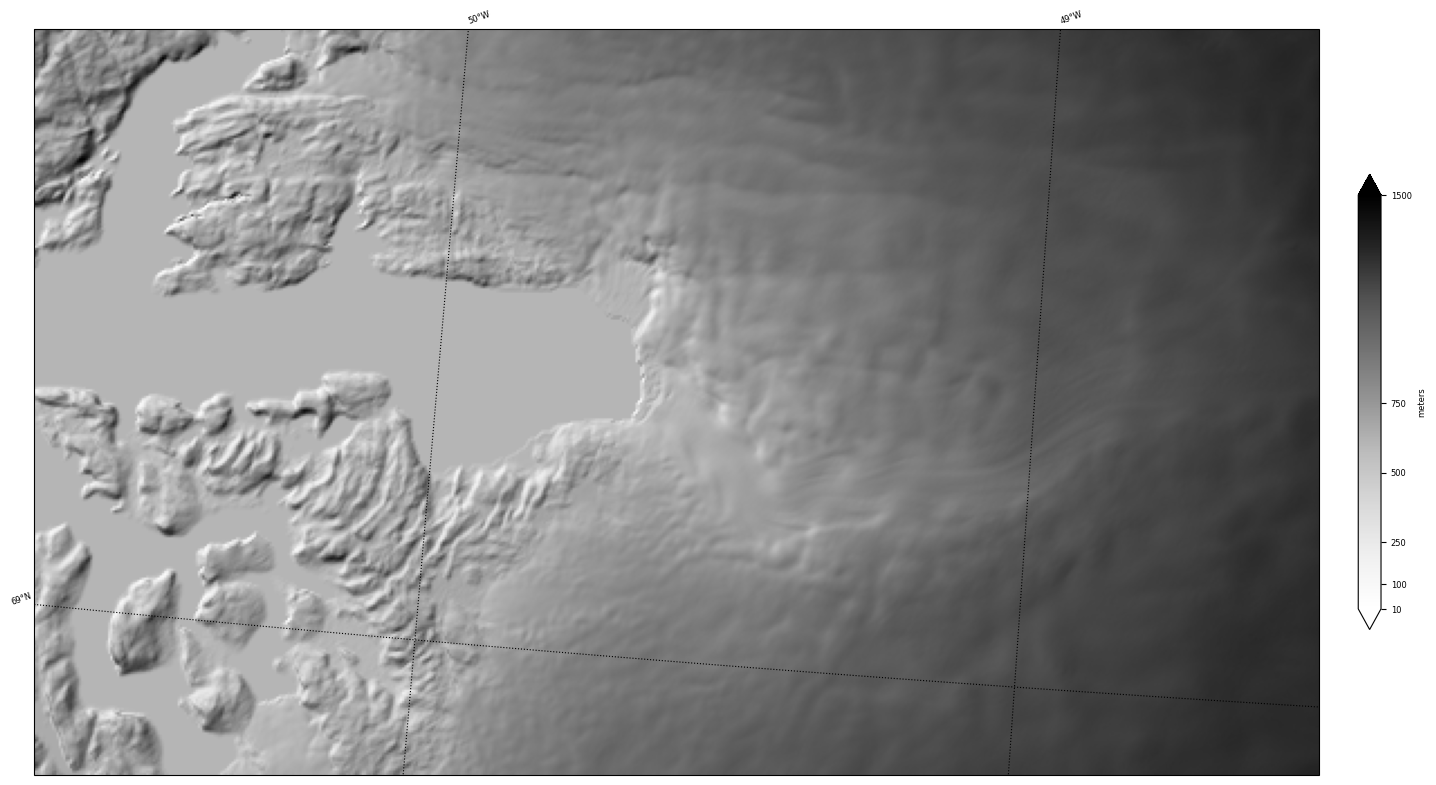

In [41]:
dem = jak_ds["surface"]
plot_glacier(dem, dem, cmap="Grays", figwidth=16)

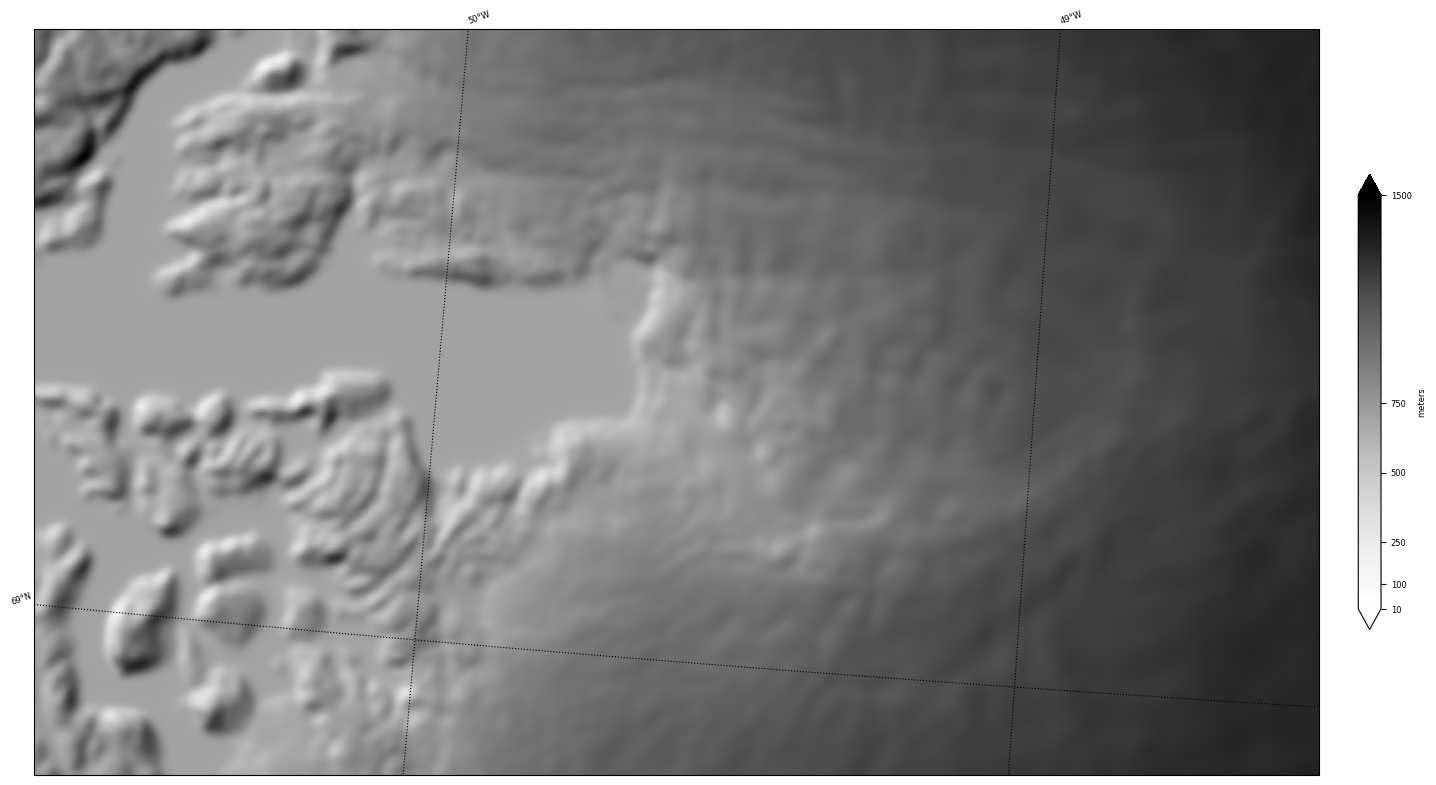

In [43]:
dem_smoothed_gaussian = jak_ds["surface"].copy()
dem_smoothed_gaussian.values = gaussian_filter(jak_ds["surface"], 2)
plot_glacier(dem_smoothed_gaussian, dem_smoothed_gaussian, cmap="Grays", figwidth=16)

In [45]:
H = jak_ds["thickness"].copy()

In [47]:
l = 4
L = l * H

In [48]:
from scipy.spatial.distance import pdist, squareform

In [81]:
X, Y = np.meshgrid(H.x, H.y)

In [135]:
D = squareform(pdist(X.T))

In [137]:
Sigma = (1 + D**2 / (2 *(l * HH)**2))**(-1)

/tmp/ipykernel_1061750/1452242820.py:1: RuntimeWarning: divide by zero encountered in divide
  Sigma = (1 + D**2 / (2 *(l * HH)**2))**(-1)
/tmp/ipykernel_1061750/1452242820.py:1: RuntimeWarning: invalid value encountered in divide
  Sigma = (1 + D**2 / (2 *(l * HH)**2))**(-1)


In [127]:
((1 + D**2 / (2 * (l * (H.to_numpy() @ H.to_numpy().T)**(1/2))**2))**(-1)).max()

1.0

In [132]:
HH = ((H.to_numpy().T @ H.to_numpy())**(1/2))

In [143]:
np.nanmin(Sigma)

0.0

In [145]:
gaussian_filter(jak_ds["surface"], Sigma, rank=3)

TypeError: gaussian_filter() got an unexpected keyword argument 'rank'

In [146]:
gaussian_filter?

Signature:
gaussian_filter(
    input,
    sigma,
    order=0,
    output=None,
    mode='reflect',
    cval=0.0,
    truncate=4.0,
    *,
    radius=None,
    axes=None,
)
Docstring:
Multidimensional Gaussian filter.

Parameters
----------
input : array_like
    The input array.
sigma : scalar or sequence of scalars
    Standard deviation for Gaussian kernel. The standard
    deviations of the Gaussian filter are given for each axis as a
    sequence, or as a single number, in which case it is equal for
    all axes.
order : int or sequence of ints, optional
    The order of the filter along each axis is given as a sequence
    of integers, or as a single number. An order of 0 corresponds
    to convolution with a Gaussian kernel. A positive order
    corresponds to convolution with that derivative of a Gaussian.
output : array or dtype, optional
    The array in which to place the output, or the dtype of the
    returned array. By default an array of the same dtype as input
    will 